<a href="https://colab.research.google.com/github/Vikash852/X_ray_Image_Classification-and-PreTrained-Models/blob/main/X_ray_Image_Classification_with_PreTrained_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# X-ray Image Classification

In [17]:
# importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os

In [18]:
# Load the Drive helper and mount
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [19]:
# setting the training data directory
DataDir = r"/content/drive/MyDrive/X_ray_dataset/train/"

In [20]:
# intiallizing the category of classification
CATEGORIES = ["NORMAL", "PNEUMONIA"]

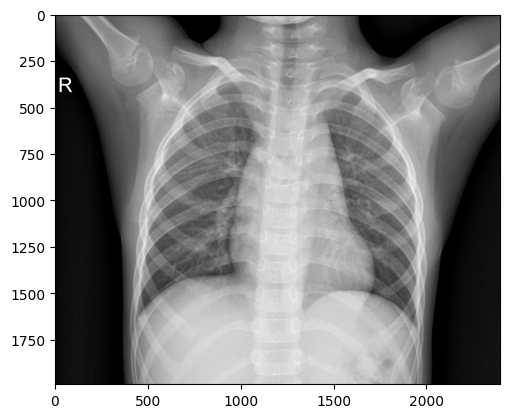

In [21]:
# converting the images into grayscale
for i in CATEGORIES:
    path=os.path.join(DataDir,i)
    for img in os.listdir(path):
        img_array=cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array,cmap='gray')
        plt.show()
        break
    break

In [22]:
# intializing the size of the image so that every image should be in same dimension
img_size=100

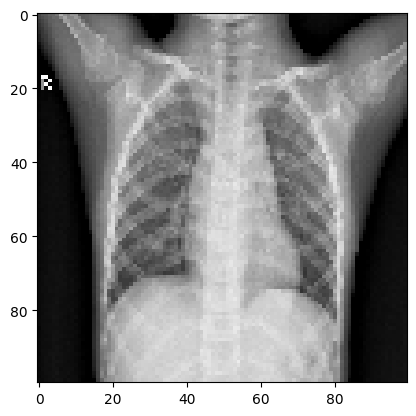

In [23]:
# image after resize and gray scale
new_array=cv2.resize(img_array,(img_size,img_size))
plt.imshow(new_array,cmap='gray')
plt.show()

In [24]:
training_data=[]

In [25]:
# defining the function for training data according to the categories converting the images into gray scale with resizing the image into 100 x 100
# converting it into numpy arrays
def create_training_data():
    for i in CATEGORIES:

        path=os.path.join(DataDir,i)
        class_num=CATEGORIES.index(i)

        for img in os.listdir(path):
            try:
                img_array=cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
                new_array=cv2.resize(img_array,(img_size,img_size))
                training_data.append([new_array,class_num])

            except Exception as e:
                pass

In [26]:
create_training_data()

In [27]:
print(len(training_data))

5226


In [28]:
import random
random.shuffle(training_data)
for sample in training_data[:10]:
    print(sample)

[array([[69, 64, 67, ..., 79, 74, 68],
       [76, 70, 71, ..., 76, 73, 68],
       [78, 74, 77, ..., 79, 67, 64],
       ...,
       [ 0,  0,  0, ...,  0,  0,  3],
       [ 0,  0,  0, ...,  0,  1,  4],
       [ 0,  0,  0, ...,  0,  1,  0]], dtype=uint8), 0]
[array([[29, 32, 32, ..., 35, 28, 35],
       [34, 35, 36, ..., 30, 27, 34],
       [34, 36, 34, ..., 32, 32, 42],
       ...,
       [48, 33, 23, ...,  0,  0,  0],
       [31, 19,  0, ...,  0,  0,  0],
       [ 1,  0,  3, ...,  0,  0,  0]], dtype=uint8), 1]
[array([[0, 0, 0, ..., 7, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), 0]
[array([[ 12,  12,   9, ...,  64,  60,  39],
       [ 13,  10,   8, ...,  66,  58,  41],
       [ 11,   9,   6, ...,  68,  54,  38],
       ...,
       [ 17,  33,  69, ..., 131,  43,  31],
       [ 18,  28,  67, ..., 130,  53,  31],
       [ 18,  29,  63, ...

In [29]:
X=[]
y=[]

In [30]:
# spliting the features and labels
for features,label in training_data:
    X.append(features)
    y.append(label)

In [31]:
print(X[0].reshape(-1,img_size,img_size,1))

[[[[69]
   [64]
   [67]
   ...
   [79]
   [74]
   [68]]

  [[76]
   [70]
   [71]
   ...
   [76]
   [73]
   [68]]

  [[78]
   [74]
   [77]
   ...
   [79]
   [67]
   [64]]

  ...

  [[ 0]
   [ 0]
   [ 0]
   ...
   [ 0]
   [ 0]
   [ 3]]

  [[ 0]
   [ 0]
   [ 0]
   ...
   [ 0]
   [ 1]
   [ 4]]

  [[ 0]
   [ 0]
   [ 0]
   ...
   [ 0]
   [ 1]
   [ 0]]]]


In [32]:
y = np.array(y)

In [33]:
# reshapping the features for making it compatible with tensorflow
X = np.array(X).reshape(-1,img_size,img_size,1)

In [38]:
# as we do for training data similiarly doing with validation data
validation_data=[]
DataDir_val= r"/content/drive/MyDrive/X_ray_dataset/val"

In [39]:
def create_validating_data():
    for i in CATEGORIES:

        path=os.path.join(DataDir_val,i)
        class_num=CATEGORIES.index(i)

        for img in os.listdir(path):
            try:
                img_array=cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
                new_array=cv2.resize(img_array,(img_size,img_size))
                validation_data.append([new_array,class_num])

            except Exception as e:
                pass

In [40]:
create_validating_data()
print(len(validation_data))

16


In [41]:
import random
random.shuffle(validation_data)
for sample in validation_data[:10]:
    print(sample)

[array([[17, 19, 26, ..., 27, 15, 17],
       [18, 23, 33, ..., 53, 43, 22],
       [19, 27, 32, ..., 51, 35, 28],
       ...,
       [ 6,  4,  5, ...,  0,  2,  3],
       [ 6,  4,  5, ...,  0,  2,  3],
       [ 5,  6,  3, ...,  0,  2,  0]], dtype=uint8), 1]
[array([[  0,   8,  24, ...,  65,  61, 103],
       [  0,   3,  23, ...,  67,  59, 121],
       [  1,   0,  18, ...,  61,  58, 123],
       ...,
       [  2,   2,   2, ...,   1,   2,   2],
       [  2,   2,   2, ...,   1,   2,   2],
       [  2,   2,   2, ...,   1,   2,   2]], dtype=uint8), 1]
[array([[  0,  20,  15, ...,  10,  14,  15],
       [239,  19,  15, ...,  12,  13,  14],
       [ 21,  18,  15, ...,  11,  14,  15],
       ...,
       [ 30,  33,  31, ...,  35,  32,  32],
       [ 32,  34,  29, ...,  35,  32,  27],
       [ 44,  33,  31, ...,  37,  30,  27]], dtype=uint8), 0]
[array([[ 0,  5, 16, ..., 79, 47, 29],
       [ 0,  3, 15, ..., 78, 47, 27],
       [ 0,  3, 16, ..., 77, 52, 25],
       ...,
       [ 1,  1,  0, ...,

In [42]:
X_val=[]
y_val=[]

In [43]:
for features,label in validation_data:
    X_val.append(features)
    y_val.append(label)

In [44]:
y_val = np.array(y_val)
X_val=np.array(X_val).reshape(-1,img_size,img_size,1)

In [45]:
# importing the library for training the model and adding the neural network layers
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense,Dropout,Activation,Flatten, Conv2D,MaxPooling2D
import pickle

In [48]:
# Pixels value ranges from 0 to 255, 0 means black, 255 means white....
# In order to scale it down to a scale of 0 to 1, we are performing this step
X = X/255.0
x_val = X_val/255.0

In [47]:
X.shape

(5226, 100, 100, 1)

In [49]:
x_val.shape

(16, 100, 100, 1)

In [50]:
# intializing the neural network layer for training the model
model= Sequential()

model.add(Conv2D(64,(3,3),input_shape=X.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(.2))

model.add(Conv2D(128,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(.2))

model.add(Conv2D(256,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(.2))

model.add(Flatten())
model.add(Dense(64))

model.add(Dropout(.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [51]:
# summary of the model
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 98, 98, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 98, 98, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 49, 49, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 49, 49, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 47, 47, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 47, 47, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 23, 23, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 23, 23, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 21, 21, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 21, 21, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 10, 10, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 10, 10, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25600)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │     1,638,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 1)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,008,193 (7.66 MB)

 Trainable params: 2,008,193 (7.66 MB)

 Non-trainable params: 0 (0.00 B)

In [52]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [53]:
# fittting the model with 10 epochs and using the validation data we have created
model.fit(X,y,batch_size=4,epochs=10,validation_data=(x_val, y_val))

Epoch 1/10
1307/1307 ━━━━━━━━━━━━━━━━━━━━ 22s 9ms/step - accuracy: 0.7419 - loss: 0.5871 - val_accuracy: 0.5000 - val_loss: 0.8589
Epoch 2/10
1307/1307 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.7429 - loss: 0.5761 - val_accuracy: 0.5000 - val_loss: 0.9404
Epoch 3/10
1307/1307 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.7354 - loss: 0.5822 - val_accuracy: 0.5000 - val_loss: 0.9418
Epoch 4/10
1307/1307 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7441 - loss: 0.5710 - val_accuracy: 0.5000 - val_loss: 0.9446
Epoch 5/10
1307/1307 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.7534 - loss: 0.5613 - val_accuracy: 0.5000 - val_loss: 0.8867
Epoch 6/10
1307/1307 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7392 - loss: 0.5771 - val_accuracy: 0.5000 - val_loss: 0.9448
Epoch 7/10
1307/1307 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.7508 - loss: 0.5638 - val_accuracy: 0.5000 - val_loss: 0.8998
Epoch 8/10
1307/1307 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7396 - loss: 0.5750 -

In [54]:
# saving the model
model.save(r"/content/drive/MyDrive/X_ray_dataset/model_10.h5")

In [55]:
# importing the library for testing the model
import cv2
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.models import load_model

In [56]:
CATEGORIES = ["NORMAL", "PNEUMONIA"]

In [57]:
# function for preparing the image for predicting the class
def prepare(image):
    img_size=100
    #img_array=cv2.imread(image,cv2.IMREAD_GRAYSCALE)
    img=tf.keras.preprocessing.image.load_img(image, color_mode='grayscale', target_size=(img_size,img_size))
    new_array=tf.keras.preprocessing.image.img_to_array(img)

    return new_array.reshape(-1,img_size,img_size,1)

In [59]:
model = tf.keras.models.load_model("/content/drive/MyDrive/X_ray_dataset/model_10.h5")

In [60]:
image = r'/content/drive/MyDrive/X_ray_dataset/test/NORMAL/IM-0059-0001.jpeg'

In [61]:
prediction=model.predict([prepare(image)/255.0])
print(prediction)
print(round(prediction[0][0]))
print(CATEGORIES[int(round(prediction[0][0]))])

/usr/local/lib/python3.12/dist-packages/keras/src/models/functional.py:241: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: input_layer
Received: inputs=('Tensor(shape=(1, 100, 100, 1))',)
  warnings.warn(msg)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 578ms/step
[[0.8288308]]
1
PNEUMONIA


In [62]:
image2 = r'/content/drive/MyDrive/X_ray_dataset/test/PNEUMONIA/person1_virus_6.jpeg'


In [63]:
prediction=model.predict([prepare(image2)/255.0])
print(prediction)
print(round(prediction[0][0]))
print(CATEGORIES[int(round(prediction[0][0]))])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
[[0.814047]]
1
PNEUMONIA


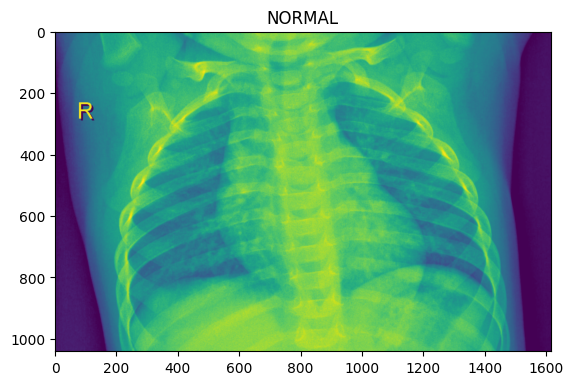

In [64]:
img=mpimg.imread(image)
imgplot=plt.imshow(img)
plt.title(CATEGORIES[int(prediction[0][0])])
plt.show()

In [65]:
# importing necessary libraries
import os
import cv2
import numpy as np
import tensorflow as tf
from keras.models import load_model

# set the path for test data
test_dir = "/content/drive/MyDrive/X_ray_dataset/test"

# define categories
CATEGORIES = ["NORMAL", "PNEUMONIA"]

# set image size
img_size = 100

# load the saved model
model = load_model('/content/drive/MyDrive/X_ray_dataset/model_10.h5')

# initialize lists for storing test data
X_test = []
y_test = []

# loop through the test data directory and extract the images and their labels
for category in CATEGORIES:
    path = os.path.join(test_dir, category)
    class_num = CATEGORIES.index(category)
    for img in os.listdir(path):
        try:
            img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
            new_array = cv2.resize(img_array, (img_size, img_size))
            X_test.append(new_array)
            y_test.append(class_num)
        except Exception as e:
            pass

# convert test data to numpy arrays
X_test = np.array(X_test).reshape(-1, img_size, img_size, 1)
y_test = np.array(y_test)

# normalize test data
X_test = X_test / 255.0

# calculate test accuracy
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)

# print test accuracy
print('Test accuracy:', test_acc)


20/20 - 2s - 106ms/step - accuracy: 0.6250 - loss: 0.7730
Test accuracy: 0.625


## Pre-Trained Models

In [66]:

# import necessary libraries
import tensorflow as tf
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# define image size
img_size = 100

# load the pre-trained model (VGG16)
base_model = VGG16(input_shape=(img_size,img_size,3), include_top=False, weights='imagenet')

# freeze the layers of the pre-trained model
for layer in base_model.layers:
    layer.trainable = False

# add custom layers for classification
x = Flatten()(base_model.output)
x = Dense(256, activation='relu')(x)
x = Dense(128, activation='relu')(x)
x = Dense(64, activation='relu')(x)
predictions = Dense(1, activation='sigmoid')(x)

# create a new model
model = Model(inputs=base_model.input, outputs=predictions)

# compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# define the image generators for training and validation data
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
val_datagen = ImageDataGenerator(rescale=1./255)

# specify the training and validation data directories
train_dir = '/content/drive/MyDrive/X_ray_dataset/train'
val_dir = '/content/drive/MyDrive/X_ray_dataset/val'

# create the image generators for training and validation data
train_generator = train_datagen.flow_from_directory(train_dir, target_size=(img_size, img_size), batch_size=32, class_mode='binary')
val_generator = val_datagen.flow_from_directory(val_dir, target_size=(img_size, img_size), batch_size=32, class_mode='binary')

# train the model
model.fit(train_generator, epochs=10, validation_data=val_generator)

# evaluate the model on test data
test_dir = '/content/drive/MyDrive/X_ray_dataset/test'
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(test_dir, target_size=(img_size, img_size), batch_size=32, class_mode='binary', shuffle=False)
test_loss, test_acc = model.evaluate(test_generator)
print('Test accuracy:', test_acc)


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Found 5226 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
164/164 ━━━━━━━━━━━━━━━━━━━━ 91s 510ms/step - accuracy: 0.8720 - loss: 0.2952 - val_accuracy: 0.7500 - val_loss: 0.3325
Epoch 2/10
164/164 ━━━━━━━━━━━━━━━━━━━━ 77s 469ms/step - accuracy: 0.9462 - loss: 0.1518 - val_accuracy: 0.7500 - val_loss: 0.3174
Epoch 3/10
164/164 ━━━━━━━━━━━━━━━━━━━━ 77s 471ms/step - accuracy: 0.9437 - loss: 0.1426 - val_accuracy: 0.9375 - val_loss: 0.2628
Epoch 4/10
164/164 ━━━━━━━━━━━━━━━━━━━━ 74s 453ms/step - accuracy: 0.9547 - loss: 0.1278 - val_accuracy: 0.8750 - val_loss: 0.2083
Epoch 5/10
164/164 ━━━━━━━━━━━━━━━━━━━━ 76s 466ms/step - accuracy: 0.9557 - loss: 0.1161 - val_accuracy: 0.8750 - val_loss: 0.2711
Epoch 6/10
164/164 ━━━━━━━━━━━━━━━━━━━━ 74s 454ms/step - accuracy: 0.9521 - loss: 0.1293 - val_accuracy: 0.7500 - val_loss: 0.5631
Epoch 7/10
164/164 ━━━━━━━━━━━━━━━━━━━━ 74s 451ms/step - accuracy: 0.9536 - loss: 0.1239 - val_accuracy: 0.7500 - val_loss: 0.3844
Epoch 8/10
164/164 ━━━━━━━━━━━━━━━━━━━━ 75s 455ms/step - accuracy: 0.9608 - loss: 0

In [67]:
# saving the pre-trained model
model.save(r"/content/drive/MyDrive/X_ray_dataset/custom_pre_trained_model_10.h5")

In [68]:
model = tf.keras.models.load_model("/content/drive/MyDrive/X_ray_dataset/custom_pre_trained_model_10.h5")

In [69]:
model.summary()

Model: "functional_51"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 100, 100, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 100, 100, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 100, 100, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 50, 50, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 50, 50, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 50, 50, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 25, 25, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 25, 25, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 25, 25, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 25, 25, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 12, 12, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 12, 12, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 12, 12, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 12, 12, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 6, 6, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 6, 6, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 6, 6, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 6, 6, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 3, 3, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │     1,179,904 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,935,811 (60.79 MB)

 Trainable params: 1,221,121 (4.66 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

 Optimizer params: 2 (12.00 B)

In [70]:
# evaluate the model on test data
test_dir = '/content/drive/MyDrive/X_ray_dataset/test'
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(test_dir, target_size=(img_size, img_size), batch_size=32, class_mode='binary', shuffle=False)
test_loss, test_acc = model.evaluate(test_generator)
print('Test accuracy:', test_acc)

Found 624 images belonging to 2 classes.
20/20 ━━━━━━━━━━━━━━━━━━━━ 8s 325ms/step - accuracy: 0.9101 - loss: 0.2475
Test accuracy: 0.9214743375778198
